In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/filemv7/datafile_MV_7
/kaggle/input/full-data/training_fix/datafile_MV_252.2
/kaggle/input/full-data/training_fix/datafile_GBW_249
/kaggle/input/full-data/training_fix/datafile_GBW_720
/kaggle/input/full-data/training_fix/datafile_MV_346.2
/kaggle/input/full-data/training_fix/datafile_GBW_604
/kaggle/input/full-data/training_fix/datafile_GBW_253
/kaggle/input/full-data/training_fix/datafile_GBW_615.2
/kaggle/input/full-data/training_fix/datafile_GBW_13.2
/kaggle/input/full-data/training_fix/datafile_MV_508.2
/kaggle/input/full-data/training_fix/datafile_GBW_140.2
/kaggle/input/full-data/training_fix/datafile_MV_520.2
/kaggle/input/full-data/training_fix/datafile_GBW_1630
/kaggle/input/full-data/training_fix/datafile_GBW_572.2
/kaggle/input/full-data/training_fix/datafile_MV_1695
/kaggle/input/full-data/training_fix/datafile_MV_1064
/kaggle/input/full-data/training_fix/datafile_GBW_546
/kaggle/input/full-data/training_fix/datafile_MV_614
/kaggle/input/full-data/training_fi

# Module Installation


Importing dependencies

In [2]:
#import dipole_module
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import joblib
import os
import time
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import gzip
import pickle

import importlib.util
import sys
import os


#Choose a random seed to make things reproducible - can be varied later
random_seed = 42
np.random.seed(random_seed)

Importing and loading the dipole module in the system.

This installations can be skipped if you already have installed the dipole_amplitude module

In [3]:
# Install required packages
!apt-get install -y cmake make g++
!pip install pybind11
!apt-get install -y libgsl-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
make is already the newest version (4.2.1-1.2).
make set to manually installed.
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 64 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgsl23 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libgsl-dev libgsl23 libgslcblas0
0 upgraded, 3 newly installed, 0 to remove and 64 not upgraded.
Need to get 1998 kB of archives.
After this operation, 9933 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 libgslcblas0 amd64 2.5+dfsg-6+deb10u1build0.

In [4]:
# Copy your project files to the /kaggle/working directory
!cp -r /kaggle/input/module/rcBK-RF-main /kaggle/working/

# Navigate to your project directory in /kaggle/working
%cd /kaggle/working/rcBK-RF-main

# Create and navigate to the build directory
!mkdir -p build
%cd build

!cmake -DCMAKE_POSITION_INDEPENDENT_CODE=ON -DCMAKE_PREFIX_PATH=$(python3 -m pybind11 --cmakedir) ..


# Build the project
!make


/kaggle/working/rcBK-RF-main
/kaggle/working/rcBK-RF-main/build
cmake: /opt/conda/lib/libcurl.so.4: no version information available (required by cmake)
-- The CXX compiler identification is GNU 9.4.0
-- The C compiler identification is GNU 9.4.0
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Found PkgConfig: /opt/conda/bin/pkg-config (found version "0.29.2") 
-- Found GSL: /usr/include (found version "2.5") 
-- Found PythonInterp: /opt/conda/bin/python3 (found suitable version "3.10.13", minimum required is "3.6") 
-- Found PythonLibs: /

In [5]:
def find_module(root_folder, module_name):
    for root, dirs, files in os.walk(root_folder):
        if module_name in files:
            return os.path.join(root, module_name)
    return None

module_path = find_module('/kaggle/working', 'dipole_module.cpython-310-x86_64-linux-gnu.so')

if module_path is None:
    print("Module not found")
else:
    print(f"Module found at: {module_path}")


Module found at: /kaggle/working/rcBK-RF-main/dipole_module.cpython-310-x86_64-linux-gnu.so


Load module into system

In [6]:

# specify the path to your module
module_path = "/kaggle/working/rcBK-RF-main/dipole_module.cpython-310-x86_64-linux-gnu.so"

# load the module
spec = importlib.util.spec_from_file_location("dipole_module", module_path)
dipole_module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = dipole_module 
spec.loader.exec_module(dipole_module)

# Data Prep

In [7]:
#This function reads in the dipole from file 'file' at x_Bjorken 'xbj'
#It uses Heikki's dipole amplitude code to extract the r dependent dipole
#at xbj doing the required interpolations
def read_dipole(file, xbj):
    try:
        if os.path.exists(file):  # Check if the file exists
            result = dipole_module.dipole_amplitude(file, xbj)
            lines = result.strip().split('\n')
        
            # Initialize c2_value
            c2_value = None

            # Read C2 from first line
            if lines and lines[0].startswith("#"):
                c2_value = float(lines[0].split()[1])

            # Remove the first line
            if lines:
                lines = lines[1:]
        
            data = [list(map(float, line.split())) for line in lines]
            result_array = np.array(data).T
        
            return result_array, c2_value
        else:
            print(f"File {file} does not exist.")
            return None, None  # Return None values if the file doesn't exist
    except Exception as e:
        print(f"An error occurred while processing {file} with xbj={xbj}: {e}")
        return None, None  # Return None values in case of an error

    
# Folder containing data files
data_folder = "/kaggle/input/full-data/training_fix"

# Dynamically list all files in the folder
file_names = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, file))]

# Number of files in the folder
max_files = len(file_names)

In [8]:
#Load data

#array of x values
exponent_values = np.linspace(-6, -2, 20 )
x_values = 10.**(exponent_values)

#Initialize initial data array
initial_data = []

xdim = len(x_values)
print("Number of x values =",xdim)

target_data = []
  
max_files = len(file_names)#5000

for i in range(xdim):
    #Set target x value
    xbj_target = x_values[i]
    target_data_aux = []
    count = 0
    for file in tqdm(file_names, desc="Loading training and validation data", unit="file"):
        #print(file)
        #print("x value =",xbj_target)
        result_array, c2_value = read_dipole(file, xbj_target)
        if i == xdim-1:
            # Append c2_value to result_array[1]
            target_data_aux.append(result_array[1])
            new_result_array = np.append(result_array[1], c2_value)
            initial_data.append(new_result_array)
        else:
            target_data_aux.append(result_array[1])
        count = count + 1
        if count >= max_files:
            break
    target_data.append(np.array(target_data_aux))
   
            
input_values = np.vstack(initial_data)
r = result_array[0]
print(len(target_data))

Number of x values = 20


Loading training and validation data: 100%|█████████▉| 6143/6144 [01:30<00:00, 67.74file/s]

20


Modify data to include x_bj as parameter

In [9]:
# Initialize the list to hold modified arrays
modified_data = []

for i in range(xdim):
    # Set target x value
    xbj_target = x_values[i]

    # Append xbj_target to each array in input_values
    appended_input_values = np.array([np.append(arr, xbj_target) for arr in input_values])

    # Store the modified arrays
    modified_data.append(appended_input_values)

# Convert the list of arrays to a single numpy array (if needed)
modified_data = np.array(modified_data)

print(modified_data.shape)  # This will show the shape of the modified data array

input_values_modified= [item for sublist in modified_data for item in sublist]

(20, 6144, 103)


In [10]:
target_values_modified = []
for sub_array in target_data:
    target_values_modified.extend(sub_array)

print(len(target_values_modified))
print(len(input_values_modified))

122880
122880


This step(below) can also be skipped.

It is essentially saving/dumpming the numpy arrays so that we don't have to process through the files again and again.

In [11]:
# Save arrays
np.save('input_values.npy', input_values_modified)
np.save('target_values.npy', target_values_modified)

# Load arrays
input_values_loaded = np.load('input_values.npy')
target_values_loaded = np.load('target_values.npy')
# Save
with open('data.pkl', 'wb') as f:
    pickle.dump((input_values_modified, target_values_modified), f)

Preprocess Data

In [12]:
n_components = 10
# Convert the list of arrays to a 2D NumPy array
input_values_modified = np.array(input_values_modified)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(input_values_modified, target_values_modified, test_size=0.2, random_state=42, shuffle=True)

# Print the length of a sample from the training set
print(len(X_train[0]))

# Convert to NumPy arrays if they are not already
X_train = np.array(X_train)
X_val = np.array(X_val)

# Separate the features to be standardized and the feature to be kept raw
X_train_features = X_train[:, :-1]  # All features except the last one
X_train_last_feature = X_train[:, -1].reshape(-1, 1)  # The last feature

X_val_features = X_val[:, :-1]
X_val_last_feature = X_val[:, -1].reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_train_features_standardized = scaler.fit_transform(X_train_features)
X_val_features_standardized = scaler.transform(X_val_features)

# Concatenate the standardized features with the raw last feature
X_train_standardized = np.concatenate([X_train_features_standardized, X_train_last_feature], axis=1)
X_val_standardized = np.concatenate([X_val_features_standardized, X_val_last_feature], axis=1)

# Verify the result
#print("Original X_train sample:", X_train[0])
#print("Standardized X_train sample:", X_train_standardized[0])


103


# SMALL MODEL: 50MB

Mean Squared Error (Ensemble): 5.293496166000387e-05
R-squared (Ensemble): 0.9925838698803476


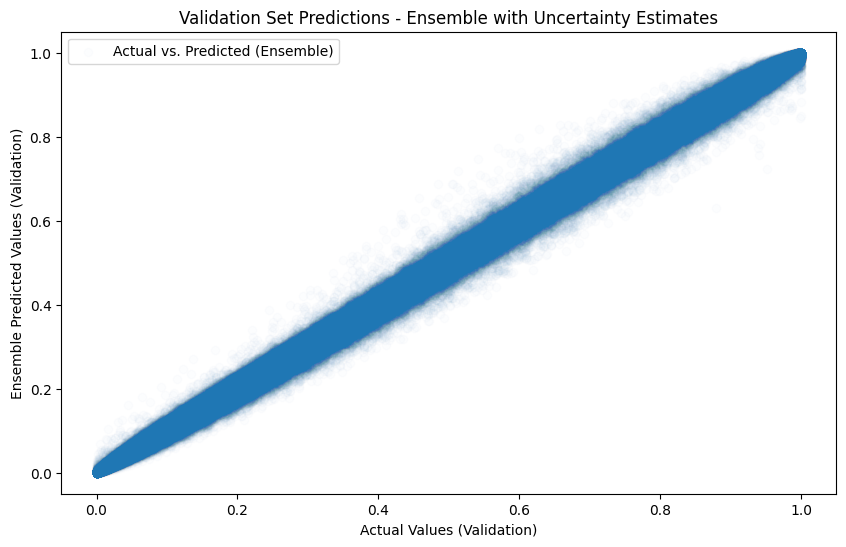

In [13]:
# Define and train the Random Forest model
rf_model_small = RandomForestRegressor(n_estimators=n_components, max_depth = 12, min_samples_leaf=1, random_state=42)#10,12
rf_model_small.fit(X_train_standardized, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model_small.predict(X_val_standardized)

# Obtain uncertainty estimates (variance) across trees
y_val_pred_all_trees = np.stack([tree.predict(X_val_standardized) for tree in rf_model_small.estimators_], axis=0)
y_val_pred_variance = np.var(y_val_pred_all_trees, axis=0)

# Evaluate performance on the validation set
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print(f'Mean Squared Error (Ensemble): {mse_val_rf}')
print(f'R-squared (Ensemble): {r2_val_rf}')

# Visualization with uncertainty estimates
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_rf, alpha=0.01, label='Actual vs. Predicted (Ensemble)')

plt.xlabel('Actual Values (Validation)')
plt.ylabel('Ensemble Predicted Values (Validation)')
plt.title('Validation Set Predictions - Ensemble with Uncertainty Estimates')
plt.legend()
plt.show()



In [14]:
# Save and compress the scaler model
with gzip.GzipFile('scaler_v1_1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler model saved and compressed successfully!")


# Save and compress the Random Forest model
with gzip.GzipFile('rf_v1_1.pkl', 'w') as f:
    pickle.dump(rf_model_small, f)

print("Model saved and compressed successfully!")

Scaler model saved and compressed successfully!
Model saved and compressed successfully!


# MEDIUM MODEL: 240MB

Mean Squared Error (Compressed Ensemble): 2.3869989805251584e-05
R-squared (Compressed Ensemble): 0.9941461693170309


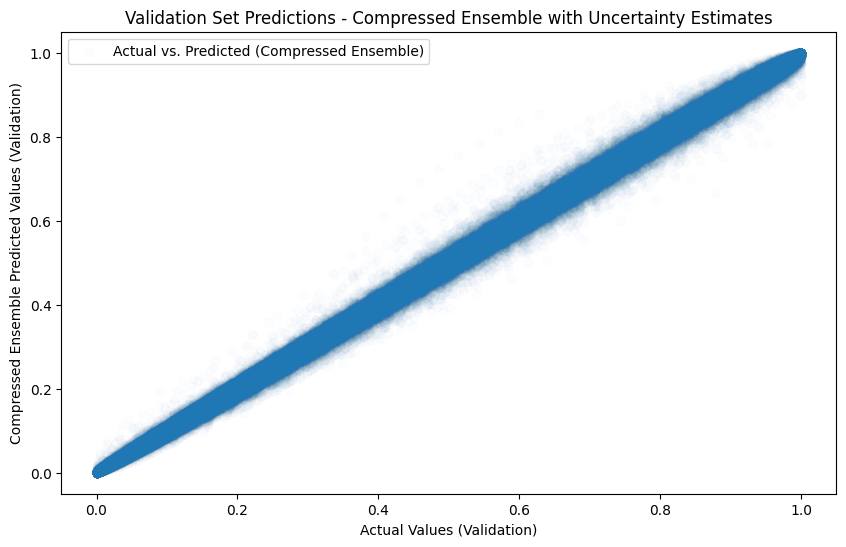

In [15]:
# Reduce the number of trees and prune the trees to reduce model size
rf_model_med = RandomForestRegressor(
    n_estimators=(n_components + 20) // 2,  # Reducing the number of estimators by half compared to large model
    max_depth=15,  # Reduced max_depth
    min_samples_leaf=2,  # Increased min_samples_leaf for pruning
    random_state=42
)
rf_model_med.fit(X_train_standardized, y_train)

# Make predictions on the validation set
y_val_pred_rf_compressed = rf_model_med.predict(X_val_standardized)

# Obtain uncertainty estimates (variance) across trees
y_val_pred_all_trees_compressed = np.stack([tree.predict(X_val_standardized) for tree in rf_model_med.estimators_], axis=0)
y_val_pred_variance_compressed = np.var(y_val_pred_all_trees_compressed, axis=0)

# Evaluate performance on the validation set
mse_val_rf_compressed = mean_squared_error(y_val, y_val_pred_rf_compressed)
r2_val_rf_compressed = r2_score(y_val, y_val_pred_rf_compressed)

print(f'Mean Squared Error (Compressed Ensemble): {mse_val_rf_compressed}')
print(f'R-squared (Compressed Ensemble): {r2_val_rf_compressed}')

# Visualization with uncertainty estimates
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_rf_compressed, alpha=0.01, label='Actual vs. Predicted (Compressed Ensemble)')
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Compressed Ensemble Predicted Values (Validation)')
plt.title('Validation Set Predictions - Compressed Ensemble with Uncertainty Estimates')
plt.legend()
plt.show()


In [16]:
# Save and compress the scaler model
with gzip.GzipFile('scaler_v2_1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler model saved and compressed successfully!")


# Save and compress the Random Forest model
with gzip.GzipFile('rf_v2_1.pkl', 'w') as f:
    pickle.dump(rf_model_med, f)

print("Model saved and compressed successfully!")

Scaler model saved and compressed successfully!
Model saved and compressed successfully!


# LARGEST MODEL: 1.8GB

Mean Squared Error (Ensemble): 1.5032154359183155e-05
R-squared (Ensemble): 0.9953230984546616


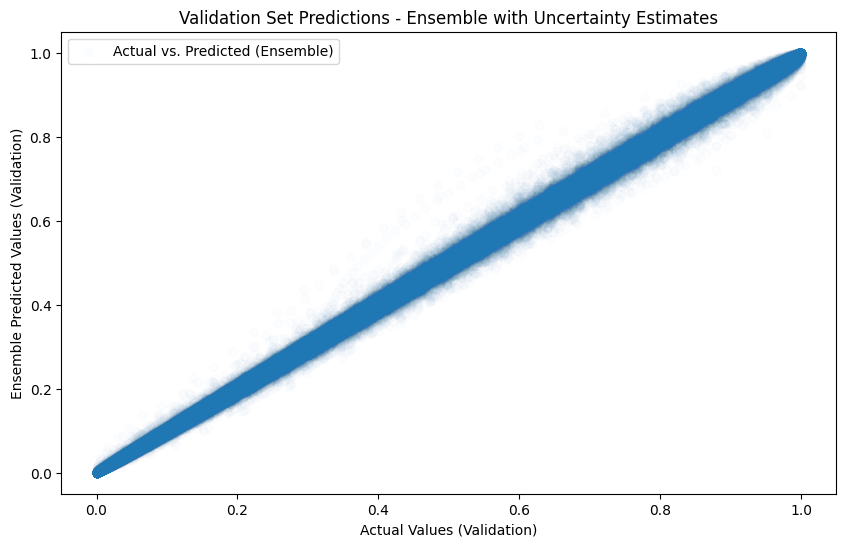

In [17]:
# Define and train the Random Forest model
rf_model_large = RandomForestRegressor(n_estimators=n_components+20, max_depth = 18, min_samples_leaf=1, random_state=42)#10,12
rf_model_large.fit(X_train_standardized, y_train)

# Make predictions on the validation set
y_val_pred_rf = rf_model_large.predict(X_val_standardized)

# Obtain uncertainty estimates (variance) across trees
y_val_pred_all_trees = np.stack([tree.predict(X_val_standardized) for tree in rf_model_large.estimators_], axis=0)
y_val_pred_variance = np.var(y_val_pred_all_trees, axis=0)

# Evaluate performance on the validation set
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print(f'Mean Squared Error (Ensemble): {mse_val_rf}')
print(f'R-squared (Ensemble): {r2_val_rf}')

# Visualization with uncertainty estimates
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_rf, alpha=0.01, label='Actual vs. Predicted (Ensemble)')

plt.xlabel('Actual Values (Validation)')
plt.ylabel('Ensemble Predicted Values (Validation)')
plt.title('Validation Set Predictions - Ensemble with Uncertainty Estimates')
plt.legend()
plt.show()



In [18]:
# Save and compress the scaler model
with gzip.GzipFile('scaler_v3_1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler model saved and compressed successfully!")


# Save and compress the Random Forest model
with gzip.GzipFile('rf_v3_1.pkl', 'w') as f:
    pickle.dump(rf_model_large, f)

print("Model saved and compressed successfully!")

Scaler model saved and compressed successfully!
Model saved and compressed successfully!


Can skip this

# PRUNED MODEL

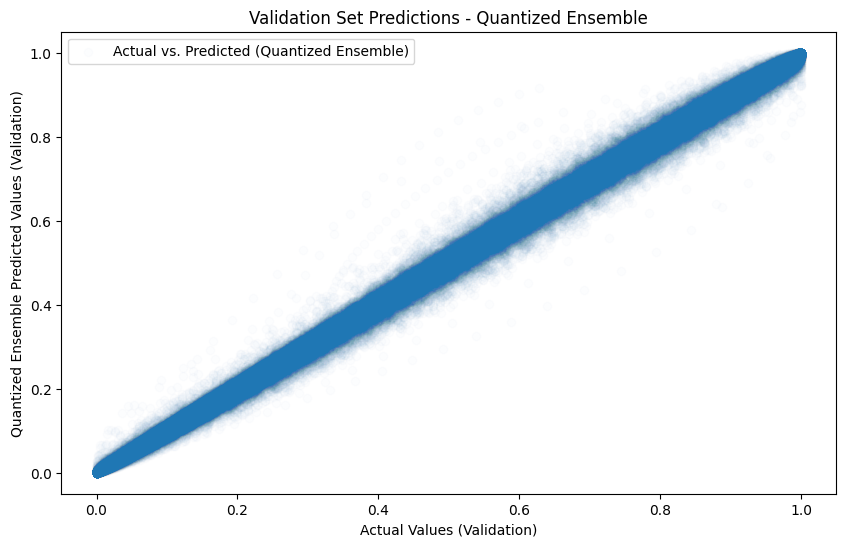

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.tree import export_text

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(input_values_modified, target_values_modified, test_size=0.2, random_state=42, shuffle=True)


# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_val_standardized = scaler.transform(X_val)


# Prune the trees by setting a maximum depth and minimum samples per leaf
rf_model_pruned = RandomForestRegressor(
    n_estimators=20,  # Increased number of trees 20
    max_depth=15,  # Reduced depth 15
    min_samples_leaf=5,  # Increased min_samples_leaf min=2 size was 250mb
    random_state=42
)
rf_model_pruned.fit(X_train_standardized, y_train)
y_val_pred_rf_pruned = rf_model_pruned.predict(X_val_standardized)
"""
# Apply quantization by converting the model to 16-bit floats
def quantize_model(model):
    for estimator in model.estimators_:
        for node in estimator.tree_.__getstate__()['nodes']:
            node['threshold'] = np.float16(node['threshold'])
            node['impurity'] = np.float16(node['impurity'])
            node['weighted_n_node_samples'] = np.float16(node['weighted_n_node_samples'])
    return model

rf_model_quantized = quantize_model(rf_model_pruned)

# Make predictions on the validation set
y_val_pred_rf_quantized = rf_model_quantized.predict(X_val_standardized)

# Evaluate performance on the validation set
mse_val_rf_quantized = mean_squared_error(y_val, y_val_pred_rf_quantized)
r2_val_rf_quantized = r2_score(y_val, y_val_pred_rf_quantized)

print(f'Mean Squared Error (Quantized Ensemble): {mse_val_rf_quantized}')
print(f'R-squared (Quantized Ensemble): {r2_val_rf_quantized}')

# Save and compress the Random Forest model
with gzip.GzipFile('rf_model_quantized_2', 'w') as f:
    pickle.dump(rf_model_quantized, f)

print("Model saved and compressed successfully!")
# Save the compressed model
#joblib.dump(rf_model_quantized, 'rf_model_quantized.pkl', compress=3)

# Check the size of the saved model
import os
#model_size = os.path.getsize('rf_model_quantized_1.pkl') / (1024 * 1024)  # Convert to MB
#print(f'Model size: {model_size:.2f} MB')
"""
# Visualization with uncertainty estimates
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_rf_pruned, alpha=0.01, label='Actual vs. Predicted (Quantized Ensemble)')
plt.xlabel('Actual Values (Validation)')
plt.ylabel('Quantized Ensemble Predicted Values (Validation)')
plt.title('Validation Set Predictions - Quantized Ensemble')
plt.legend()
plt.show()


# CONCLUSIONS AND INFERENCES:

No of estimators doesn't play that big factor in the size of the model.

Max depth is the most important paramter that affects the size and performance of the model the most.

PCA is not very helpful. Reducing feature form 100 to 40 gave similar performance, but the size reduced was hardly 500KB so no major use of dropping insignificant features if the goal is to reduce model size.

Length of training data can performnace but training on half of the data doesn't reduce the size of the model by much either(20-30mb). So overall the size can be reduced only by reducing the dept of the trees of the forest.

In [20]:
def evaluate_random_sample(model):
    # Select a random sample from the validation data
    random_index = np.random.randint(0, len(X_val_standardized))
    random_sample = X_val_standardized[random_index]

    # Reshape the sample to match the input shape of the model
    random_sample_reshaped = random_sample.reshape(1, -1)

    # Use the model to make a prediction on the random sample
    random_sample_prediction = model.predict(random_sample_reshaped)

    # Print the prediction
    #print(f"Prediction for the random sample: {random_sample_prediction}")
    #print(f"random sample: {y_val[random_index]}")
    # Calculate error metrics
    mse = mean_squared_error([y_val[random_index]], random_sample_prediction)
    mae = mean_absolute_error([y_val[random_index]], random_sample_prediction)

    # Print error metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")

    # Plot the predicted and actual values
    plt.figure(figsize=(10, 6))
    plt.plot(r, y_val[random_index], label='Actual')
    plt.plot(r, random_sample_prediction[0], label='Predicted')
    plt.plot(r, X_val[random_index][:-2], label = 'Input')
    #print(f'Input: {X_val[random_index][:-2]}')

    # Set the y-axis and x-axis to log scale
    plt.yscale('log')
    plt.xscale('log')

    # Add plot details
    plt.legend()
    plt.title('Actual vs Predicted Values (Log Scale)')
    plt.xlabel('r')
    plt.show()


In [21]:
def plot_random():
    # Select a random sample from the validation data
    random_index = np.random.randint(0, len(X_val_standardized))
    random_sample = X_val_standardized[random_index]

    # Reshape the sample to match the input shape of the model
    random_sample_reshaped = random_sample.reshape(1, -1)

    # Use the model to make a prediction on the random sample
    prediction1 = rf_model_small.predict(random_sample_reshaped)
    prediction2 = rf_model_med.predict(random_sample_reshaped)
    prediction3 = rf_model_large.predict(random_sample_reshaped)
    prediction4 = rf_model_pruned.predict(random_sample_reshaped)


    # Plot the predicted and actual values
    plt.figure(figsize=(12, 8))
    plt.plot(r, y_val[random_index], 'k--', linewidth=2.0, label='Actual')
    plt.plot(r, prediction1[0],  label='rf_small(40mb)Prediction')
    plt.plot(r, prediction2[0], label='rf_med(230mb)Prediction')
    plt.plot(r, prediction3[0], label='rf_large(1.8gb)Prediction')
    #plt.plot(r, prediction4[0], label='rf_pruned(200mb)Prediction')
    plt.plot(r, X_val[random_index][:-2], 'r o', label = 'Input')
    #print(f'Input: {X_val[random_index][:-2]}')

    # Set the y-axis and x-axis to log scale
    plt.yscale('log')
    plt.xscale('log')

    # Add plot details
    plt.legend()
    plt.title('Actual vs Predicted Values (Log Scale)')
    plt.xlabel('r')
    plt.show()


Mean Squared Error: 0.0016437219840898015
Mean Absolute Error: 0.01734715431687967


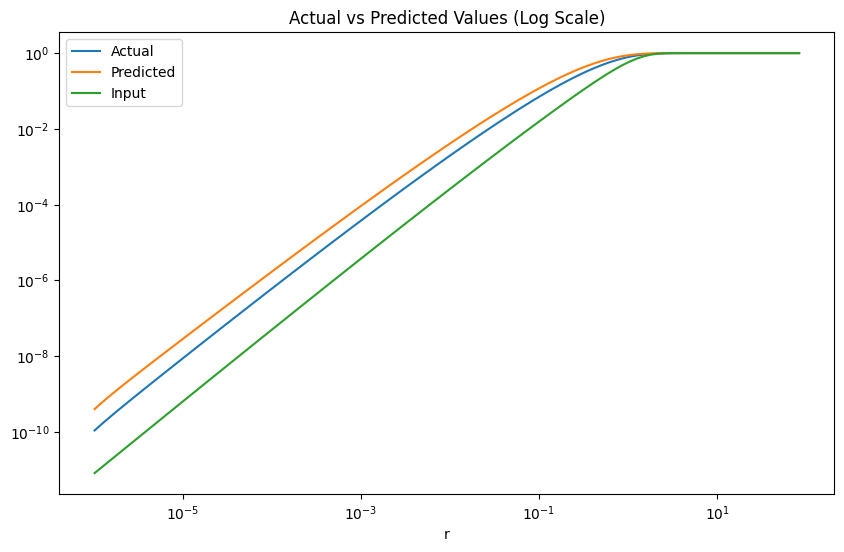

In [22]:
evaluate_random_sample(rf_model_large)

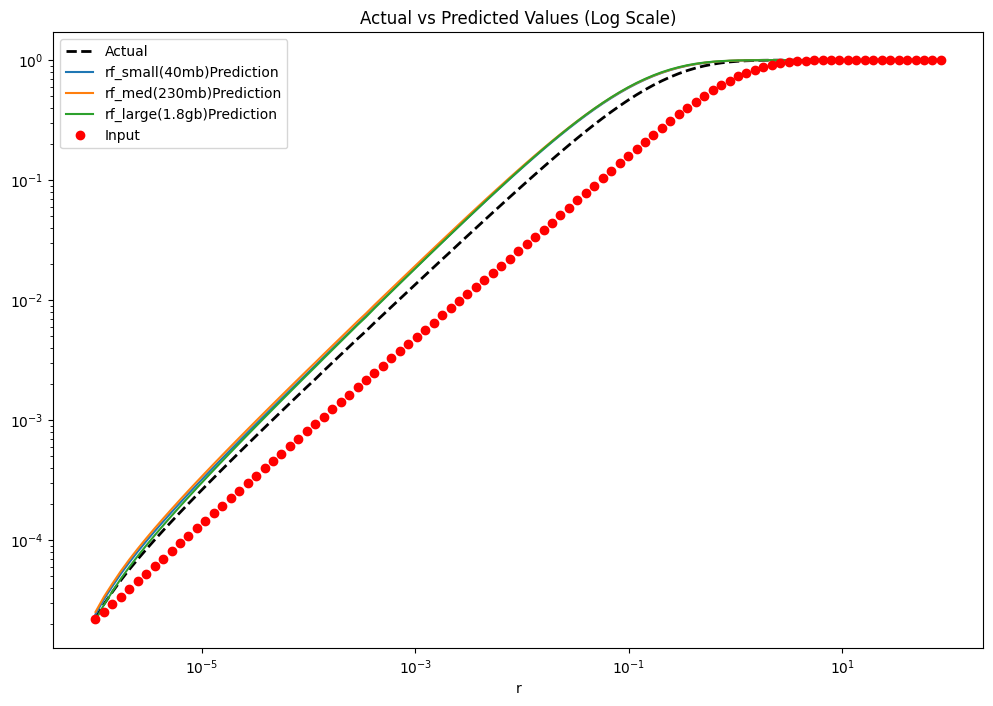

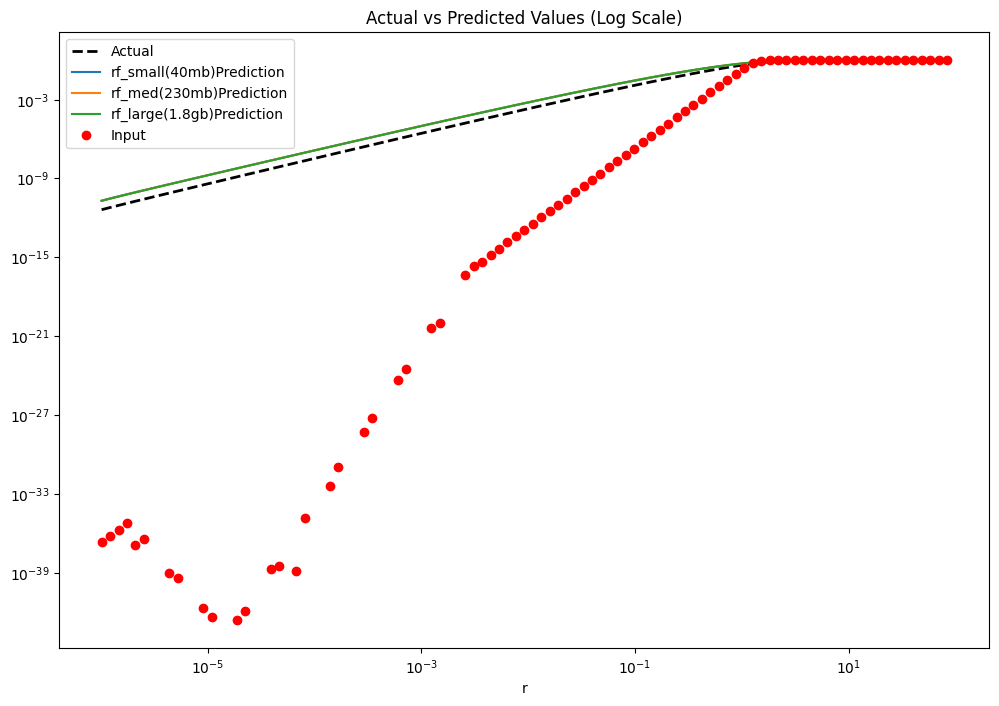

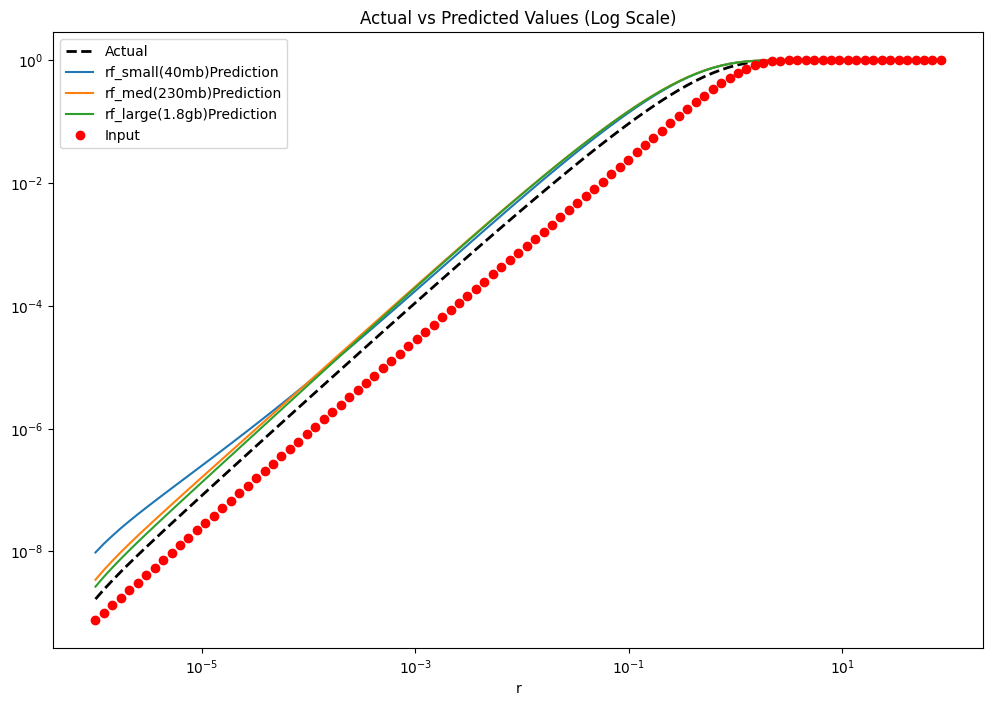

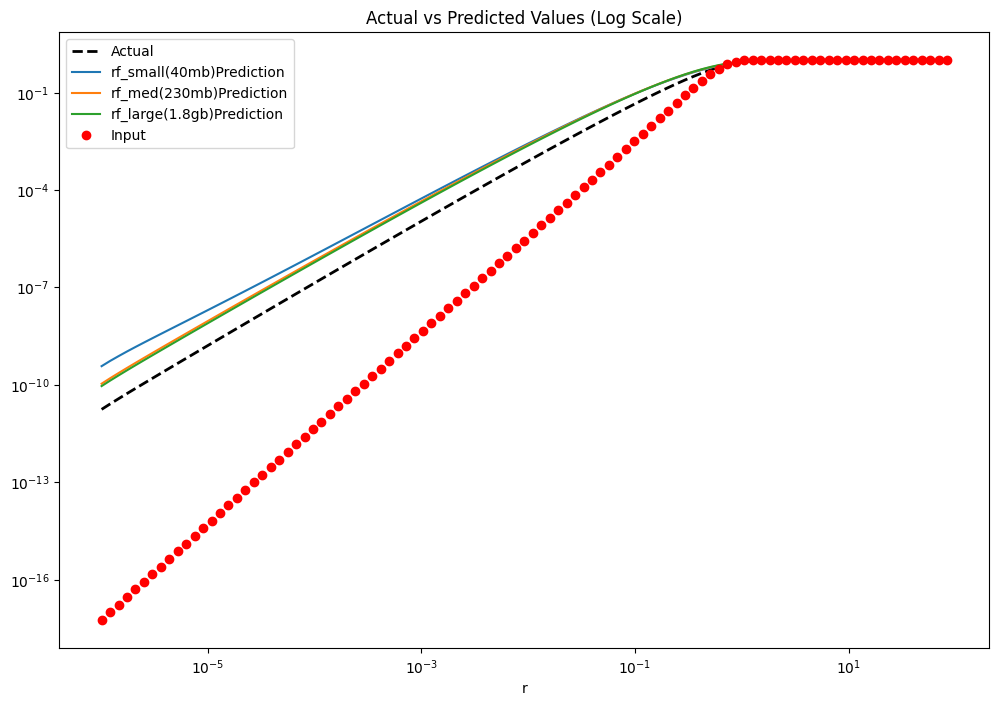

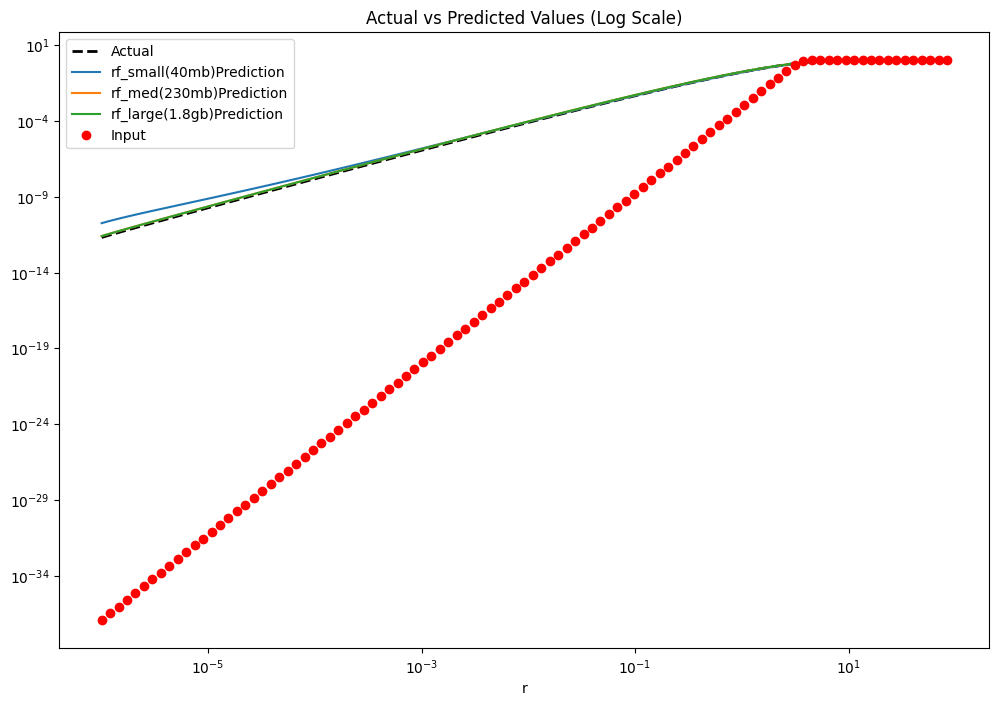

In [23]:
for i in range(5):
    plot_random()

Mean Absolute Error: 0.05933479197482471


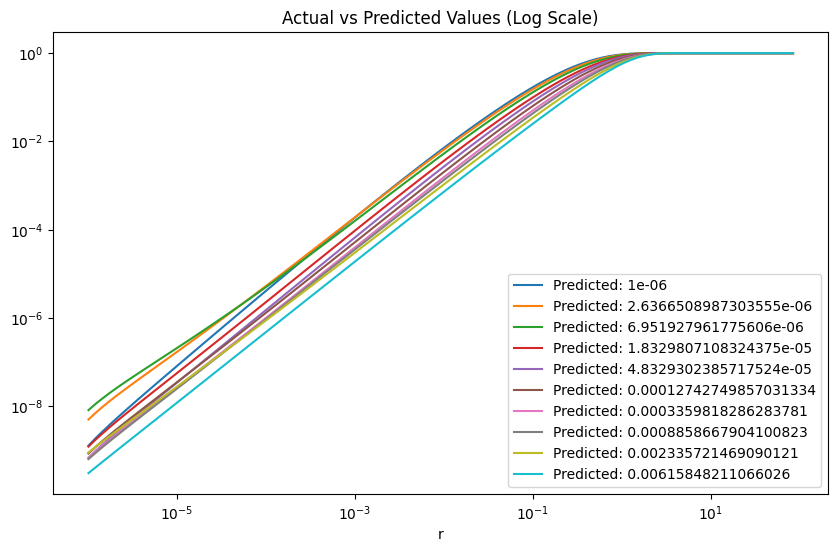

In [24]:
model = rf_model_med
# Select a random sample from the validation data
random_index = np.random.randint(0, len(X_val_standardized))
random_sample = X_val_standardized[random_index]
preds = []

# Reshape the sample to match the input shape of the model
random_sample_reshaped = random_sample.reshape(1, -1)
plt.figure(figsize=(10, 6))
for i in range (len(x_values)):
    if i % 2 == 0:
        x = x_values[i]
    else:
        continue
# Use the model to make a prediction on the random sample
    random_sample_reshaped[0][-1] = x
    random_sample_prediction = model.predict(random_sample_reshaped)
    preds.append(random_sample_prediction)
    plt.plot(r, random_sample_prediction[0], label=f'Predicted: {x}')

# Print the prediction
#print(f"Prediction for the random sample: {random_sample_prediction}")
#print(f"random sample: {y_val[random_index]}")
# Calculate error metrics
#mse = mean_squared_error([y_val[random_index]], random_sample_prediction)
mae = mean_absolute_error(preds[0][0], preds[-1][0])

# Print error metrics
#print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot the predicted and actual values
#for pred in preds:
    #plt.plot(r, pred[0], label=f'Predicted: {x}')
#plt.plot(r, y_val[random_index], label='Actual')
#plt.plot(r, X_val[random_index][:-2], label = 'Input')
#print(f'Input: {X_val[random_index][:-2]}')

# Set the y-axis and x-axis to log scale
plt.yscale('log')
plt.xscale('log')

# Add plot details
plt.legend()
plt.title('Actual vs Predicted Values (Log Scale)')
plt.xlabel('r')
plt.show()
